# CIVL 315 - Lab 1 - Water Hammer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import csv
from icecream import ic
plt.style.use("ggplot")

In [2]:
# mpl.rcParams['figure.dpi'] = 300

In [3]:
dataset = {}
file_names = [
    "LOW_ON",
    "LOW_OFF",
    "MEDIUM_ON",
    "MEDIUM_OFF",
    "HIGH_ON",
    "HIGH_OFF",
]
for fname in file_names:
    dataset[fname] = pd.read_csv(f"./labA/lab1_{fname}.csv")

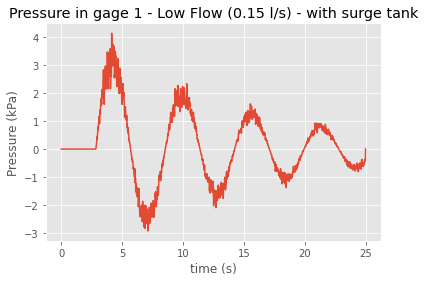

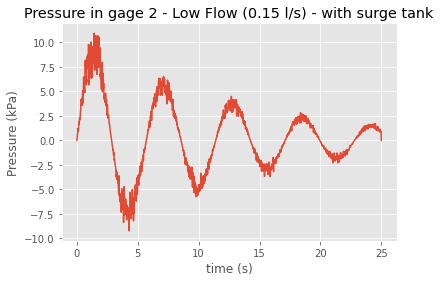

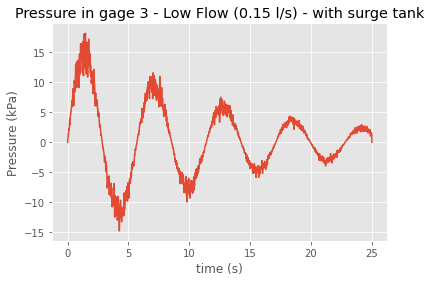

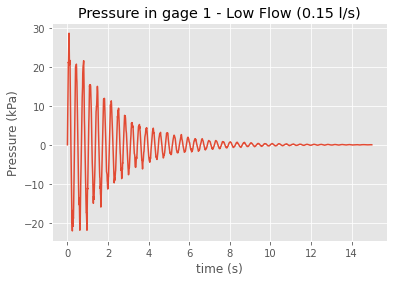

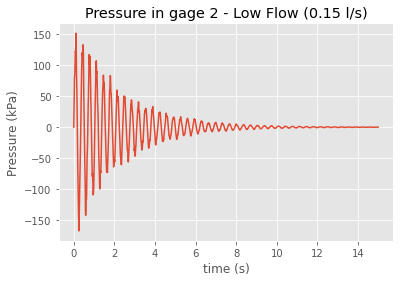

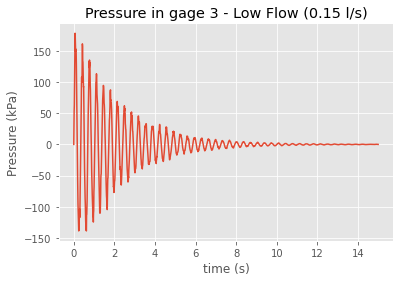

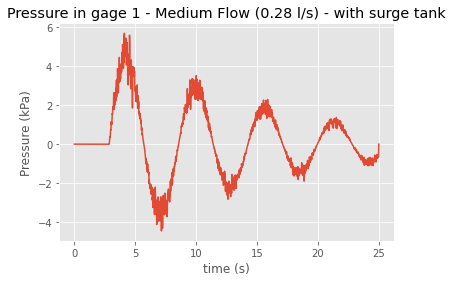

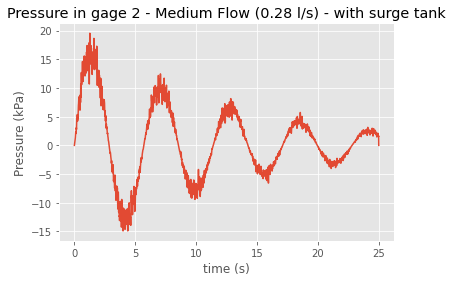

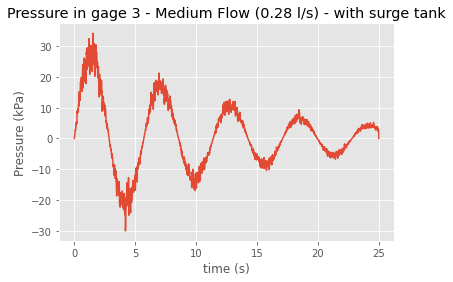

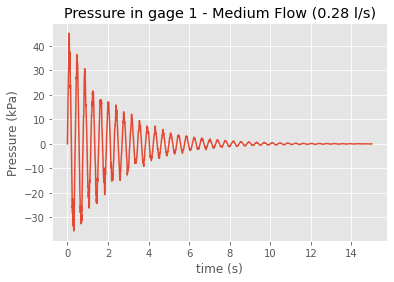

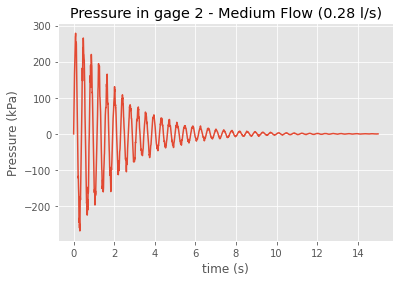

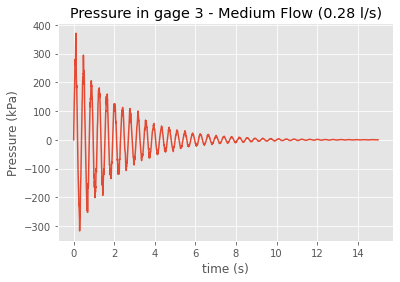

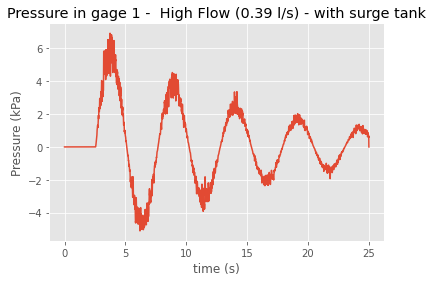

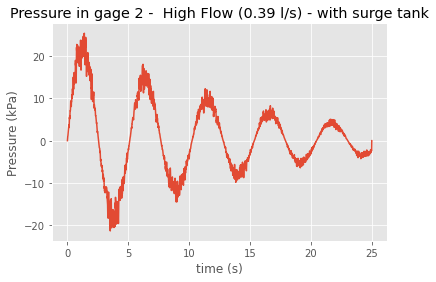

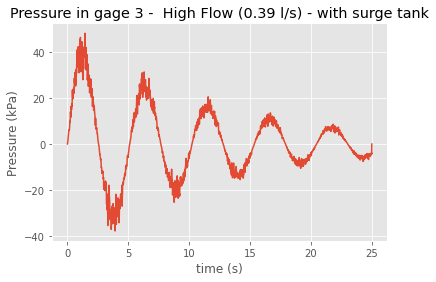

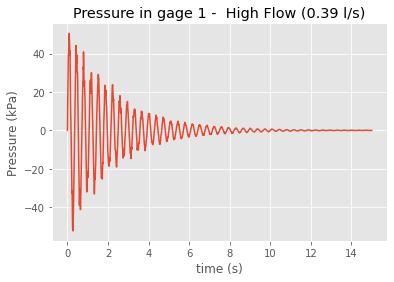

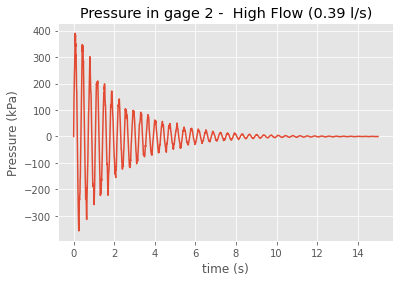

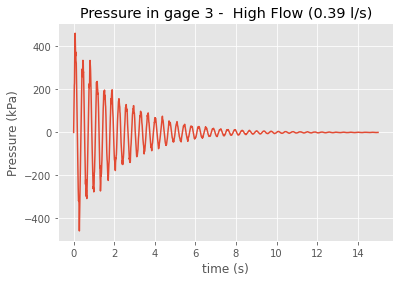

In [4]:
def plotPressureReadouts(data, filenames):
    case_identifier = {"LOW": "Low Flow (0.15 l/s)", "MEDIUM": "Medium Flow (0.28 l/s)", "HIGH":" High Flow (0.39 l/s)"}
    for index, fname in enumerate(filenames):
        for gage_num in range(1, 4):
            plt.figure()
            params = fname.split("_")
            pressureData = data[fname][f"Gage{gage_num}_kPa"].rolling(3, center=True).mean()
            pressureData.fillna(0, inplace=True)
            plt.plot(data[fname]["time"], pressureData)
            plt.title(f"Pressure in gage {gage_num} - {case_identifier[params[0]]}{' - with surge tank' if params[1] == 'ON' else ''}")
            plt.xlabel("time (s)")
            plt.ylabel("Pressure (kPa)")
            # plt.savefig(f"{fname}_gage{gage_num}.png")
plotPressureReadouts(dataset, file_names)

In [5]:
def getPressureByDistance(data, cases):
    gages = range(0, 6, 2)
    pbyg = np.zeros((len(cases), len(gages)*2))
    for i, case in enumerate(cases):
        for j, gage_num in enumerate(gages):
            pressureData = data[case][f"Gage{j+1}_kPa"].rolling(3, center=True).mean().fillna(0)
            pbyg[i, gage_num] = max(pressureData)
            pbyg[i, gage_num+1] = min(pressureData)
    flowrates = ["low flow - 0.15 l/s", " medium flow - 0.28 l/s", "high flow - 0.39 l/s"]
    gage_indices  = ["Gage 1", "Gage 2", "Gage 3"]
    statuses = ["Max", "Min"]
    return pd.DataFrame(pbyg, index=flowrates, columns=[f"{gage} - {status}" for gage in gage_indices for status in statuses])

## Off Cases

In [6]:
off_cases = [
    "LOW_OFF",
    "MEDIUM_OFF",
    "HIGH_OFF",
]
getPressureByDistance(dataset, off_cases)

,Gage 1 - Max,Gage 1 - Min,Gage 2 - Max,Gage 2 - Min,Gage 3 - Max,Gage 3 - Min
low flow - 0.15 l/s,28.64193,-22.11501,151.51545,-167.35860,178.47987,-138.88017
medium flow - 0.28 l/s,45.17505,-35.54817,278.67594,-268.77765,370.72644,-316.98726
high flow - 0.39 l/s,50.63595,-52.42791,390.14043,-356.93685,461.52780,-458.40822


## On Cases

In [7]:
on_cases = [
    "LOW_ON",
    "MEDIUM_ON",
    "HIGH_ON",
]
getPressureByDistance(dataset, on_cases)

,Gage 1 - Max,Gage 1 - Min,Gage 2 - Max,Gage 2 - Min,Gage 3 - Max,Gage 3 - Min
low flow - 0.15 l/s,4.12347,-2.91357,10.92834,-9.22794,18.18447,-14.78040
medium flow - 0.28 l/s,5.67018,-4.43739,19.53825,-14.90466,34.19766,-30.07419
high flow - 0.39 l/s,6.92259,-5.11428,25.41117,-21.34983,47.99706,-37.65078


In [8]:
di = 0.038 # m
et = 0.002 # m
rho = 1000 # kg/m^3
LPS_M3PS = 0.001
q_lo = 0.15
q_md = 0.28
q_hi = 0.39
c = 0.9
B = 2100 # Bulk fluid modulus
E = 110000 # modulus of elasticity of the pipe material

In [9]:
v_lo = (q_lo * LPS_M3PS) / (math.pi * (di/2)**2)
v_md = (q_md * LPS_M3PS) / (math.pi * (di/2)**2)
v_hi = (q_hi * LPS_M3PS) / (math.pi * (di/2)**2)

In [10]:
a = math.sqrt((2.1*10**9/rho)/(1+c*(di/et)*(B/E)))

In [11]:
a

1258.2399239096694

In [12]:
delP_LO = rho*(v_lo*LPS_M3PS)*a
delP_ME = rho*(v_md*LPS_M3PS)*a
delP_HI = rho*(v_hi*LPS_M3PS)*a
ic(delP_LO)
ic(delP_ME)
ic(delP_HI)

ic| delP_LO: 166.41698350620013
ic| delP_ME: 310.6450358782403
ic| delP_HI: 432.68415711612045


432.68415711612045

In [13]:
ic(max(dataset["LOW_OFF"]["Gage3_kPa"]))
ic(max(dataset["MEDIUM_OFF"]["Gage3_kPa"]))
ic(max(dataset["HIGH_OFF"]["Gage3_kPa"]))

ic| max(dataset["LOW_OFF"]["Gage3_kPa"]): 215.2314
ic| max(dataset["MEDIUM_OFF"]["Gage3_kPa"]): 414.91395
ic| max(dataset["HIGH_OFF"]["Gage3_kPa"]): 561.23991


561.23991

In [14]:
ic(max(dataset["LOW_OFF"]["Gage3_kPa"])/delP_LO)
ic(max(dataset["MEDIUM_OFF"]["Gage3_kPa"])/delP_ME)
ic(max(dataset["HIGH_OFF"]["Gage3_kPa"])/delP_HI)

ic| max(dataset["LOW_OFF"]["Gage3_kPa"])/delP_LO: 1.293325930234646
ic| max(dataset["MEDIUM_OFF"]["Gage3_kPa"])/delP_ME: 1.3356529224005649
ic| max(dataset["HIGH_OFF"]["Gage3_kPa"])/delP_HI: 1.2971122255566634


1.2971122255566634